This project performs a classification analysis in order to assign customers to appropriate segments. This dataset was found on Kaggle.com, https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation/data, and involves a company that is attempting to break into a new market. They believe taht customers in this market will behave similarly to those in their current market and want to assign them to segments as they have their current customers. These customer segments are use to more accurately provide customers with personalized ads. The goal of this project is to use supervised learning techniques to build a model which assigns customers to their respective segments.

In [1]:
import math
import pickle
import gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from math import exp
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.base import clone
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import operator

### Importing data

In [3]:
data = pd.read_csv('Train.csv')
data.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


### Exploratory Data Analysis

In [6]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:
print(data.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')


In [10]:
data['Work_Experience'].value_counts()[0]
data = data.dropna()

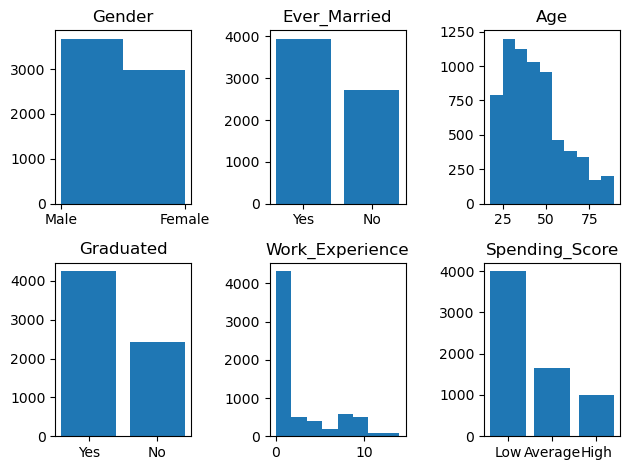

In [12]:
fig, axs = plt.subplots(2,3, sharey = False, tight_layout = True)
axs[0,0].hist(data['Gender'], bins = 2)
axs[0,0].set_title('Gender')
axs[0,1].bar(['Yes', 'No'], data['Ever_Married'].value_counts())
axs[0,1].set_title('Ever_Married')
axs[0,2].hist(data['Age'], bins = 10)
axs[0,2].set_title('Age')
axs[1,0].bar(['Yes', 'No'], data['Graduated'].value_counts())
axs[1,0].set_title('Graduated')
axs[1,1].hist(data['Work_Experience'], bins = 8)
axs[1,1].set_title('Work_Experience')
axs[1,2].bar(['Low', 'Average', 'High'], data['Spending_Score'].value_counts())
axs[1,2].set_title('Spending_Score')
plt.show()

In [14]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Ever_Married'] = LabelEncoder().fit_transform(data['Ever_Married'])
data['Graduated'] = LabelEncoder().fit_transform(data['Graduated'])
data['Profession'] = LabelEncoder().fit_transform(data['Profession'])
data['Spending_Score'] = LabelEncoder().fit_transform(data['Spending_Score'])
data['Var_1'] = LabelEncoder().fit_transform(data['Var_1'])
data['Segmentation'] = LabelEncoder().fit_transform(data['Segmentation'])
#var_1 = pd.get_dummies(data['Var_1'], drop_first = True)

In [16]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,3
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
5,461319,1,1,56,0,0,0.0,0,2.0,5,2
6,460156,1,0,32,1,5,1.0,2,3.0,5,2


In [19]:
data.info()
data['Segmentation'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   int32  
 2   Ever_Married     6665 non-null   int32  
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   int32  
 5   Profession       6665 non-null   int32  
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   int32  
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   int32  
 10  Segmentation     6665 non-null   int32  
dtypes: float64(2), int32(7), int64(2)
memory usage: 442.6 KB


Segmentation
3    1757
2    1720
0    1616
1    1572
Name: count, dtype: int64

In [67]:
scaler = StandardScaler()
scaler.fit(data)
scaled_df = pd.DataFrame(scaler.transform(data), columns = data.columns)

### Train Test Split

In [70]:
X = scaled_df.drop(['Segmentation'], axis = 1).values
y = np.ravel(data[['Segmentation']].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test))

5332 1333


### Logistic Regression Model

In [73]:
LogReg = LogisticRegression(class_weight = 'balanced', multi_class = 'multinomial', solver = 'lbfgs').fit(X_train, y_train)
y_hat_LogReg = LogReg.predict(X_test)

C:\Users\devan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


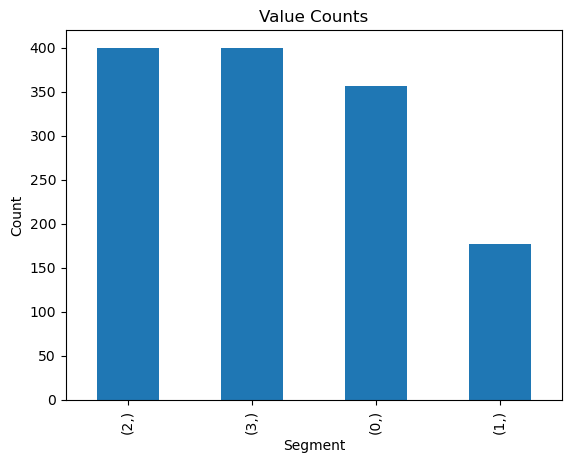

In [75]:
temp = pd.DataFrame(y_hat_LogReg)
temp.value_counts().plot(kind = 'bar')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Value Counts')
plt.show()

In [77]:
sklearn.metrics.accuracy_score(y_hat_LogReg, y_test)

0.5041260315078769

### KNN

In [80]:
class KNN:
   
    def __init__(self, x_train, y_train, K=5):
       
        from sklearn.neighbors import BallTree
        self.balltree = BallTree(x_train)
        self.y_train = y_train
        self.K = K 
        
    def majority(self, neighbor_indices, neighbor_distances=None):
        
        neighbors = self.y_train[neighbor_indices]
        labels, count = np.unique(neighbors, return_counts = True)
        
        for k in range(self.K, 0, -1):
            if len(count) > len(np.unique(count)):
                neighbors = neighbors[:-1]
                labels, count = np.unique(neighbors, return_counts = True)
            else:
                break
                
        label_counts = dict(zip(labels, count))
        majority = max(label_counts, key = label_counts.get)
        
        return np.array(majority)
        
    def classify(self, x):
    
        dist, ind = self.balltree.query([x], self.K)
        return self.majority(ind[0], neighbor_distances = dist)
        
    def predict(self, X):
       
        pred = [self.classify(point) for point in X]
        return np.array(pred)

In [82]:
knn_test = KNN(X_train, y_train, K = 6)

In [84]:
y_hat_KNN = knn_test.predict(X_test)

In [86]:
sklearn.metrics.accuracy_score(y_hat_KNN, y_test)

0.45911477869467365

In [88]:
def k_values(n):
    accuracy = []
    precision = []
    recall = []
    for i in range(1,n):
        knn = KNN(X_train, y_train, K = i)
        y_hat = knn.predict(X_test)
        accuracy.append(sklearn.metrics.accuracy_score(y_hat, y_test))
    return accuracy

In [90]:
acc = k_values(30)

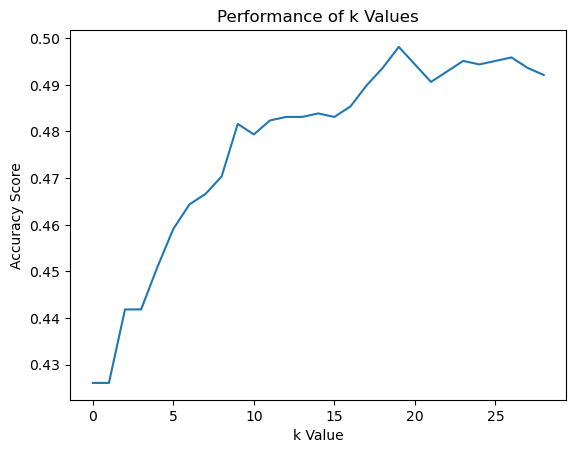

In [98]:
plt.plot(acc)
plt.xlabel('k Value')
plt.ylabel('Accuracy Score')
plt.title('Performance of k Values')
plt.show()

In [100]:
max(acc)

0.4981245311327832

In [102]:
acc.index(max(acc))

19

### Decision Tree Classifier

In [105]:
def build_tree(X, y, max_depth, max_leaf_nodes):
    clf = DecisionTreeClassifier(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes).fit(X, y)
    return clf

In [107]:
depths = range(1,15)
leaves = range(2,15)
def best_params(depth, leaves):
    acc = []
    for d in depths:
        for l in leaves:
            pred = build_tree(X_train, y_train, d, l).predict(X_test)
            acc.append(((d, l), accuracy_score(pred, y_test)))
    return acc

In [109]:
params = best_params(depths, leaves)

In [111]:
max(params, key = operator.itemgetter(1))

((4, 12), 0.5071267816954238)

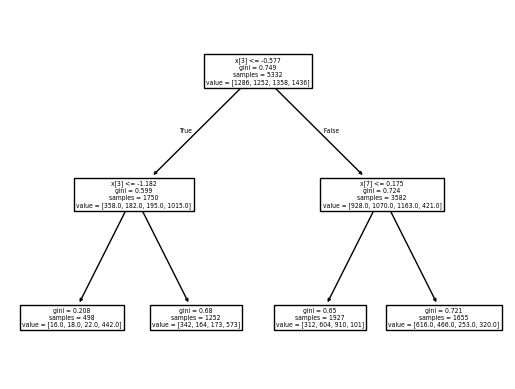

In [113]:
clf = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes = 4).fit(X_train, y_train)
sklearn.tree.plot_tree(clf)
plt.show()

### AdaBoost

In [115]:
ada = AdaBoostClassifier(estimator = clf).fit(X_train, y_train)
yhat_ada = ada.predict(X_test)

C:\Users\devan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [117]:
accuracy_score(yhat_ada, y_test)

0.5183795948987246

In [119]:
def ada_boost_acc():
    estimators = range(1,300,10)
    learning_rates = [3 + i * -0.2 for i in range(10)]
    acc = []
    for e in estimators:
        for l in learning_rates:
            classifier = AdaBoostClassifier(estimator = clf, n_estimators = e, learning_rate = l, algorithm = 'SAMME').fit(X_train, y_train)
            acc.append(((e,l), accuracy_score(classifier.predict(X_test), y_test)))
    return max(acc, key = operator.itemgetter(1))

In [121]:
ada_boost_acc()

((281, 1.4), 0.5198799699924981)

### Random Forest Classifier

In [124]:
rf = RandomForestClassifier().fit(X_train, y_train)
yhat_rf = rf.predict(X_test)

In [126]:
accuracy_score(yhat_rf, y_test)

0.495873968492123

In [128]:
def rf_acc():
    estimators = range(1, 300, 10)
    max_depth = range(12, 1, -1)
    min_samples_split = range(2, 10, 1)
    acc = []
    for e in estimators:
        for d in max_depth:
            for m in min_samples_split:
                model = RandomForestClassifier(n_estimators = e, max_depth = d, min_samples_split = m).fit(X_train, y_train)
                acc.append(((e, d, m), accuracy_score(model.predict(X_test), y_test)))
    return max(acc, key = operator.itemgetter(1))

In [130]:
rf_acc()

((211, 10, 7), 0.5461365341335334)

In [140]:
rf = RandomForestClassifier(n_estimators = 212, max_depth = 11, min_samples_split = 8).fit(X_train, y_train)
yhat_rf = rf.predict(X_test)
rf_acc = accuracy_score(yhat_rf, y_test)
rf_acc

0.5371342835708928

The Random Forest model performed the best out of the 4 tried. Through tuning of the respective models, we were able to achieve accuracy scores of 51-55 percent. Though this is far from perfect, this is a good start using supervised learning techniques. To improve upon this work, I would implement PCA in order to reduce the dimensionality of the data, then employ a heirarchical clustering method to better assign the data to a fixed number of categories. However, with the tools at my disposal in this supervised learning exercise, I am happy with how the models performed.